##IMPORTING LIBRARIES & LOADING DATA

In [ ]:
# Importing all the libraries to help in the analysis
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.style as style
import matplotlib
import seaborn as sns
import itertools
import plotly.express as ex
from scipy import stats
import warnings
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
le = LabelEncoder()
warnings.filterwarnings('ignore')

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')
# Reading csv from drive and importing as dataframe
file_path = '/content/drive/MyDrive/dataset/loan/previous_application.csv'
file_path1 = '/content/drive/MyDrive/dataset/loan/application_data.csv'

previous_dframe=pd.read_csv(file_path)
application_dframe=pd.read_csv(file_path1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#shape of the dataset
application_dframe.shape, previous_dframe.shape

((307511, 122), (1670214, 37))

In [ ]:
application_dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304854 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304854 non-null  int64  
 1   TARGET                       304854 non-null  int64  
 2   NAME_CONTRACT_TYPE           304854 non-null  float64
 3   CODE_GENDER                  304854 non-null  float64
 4   FLAG_OWN_CAR                 304854 non-null  float64
 5   FLAG_OWN_REALTY              304854 non-null  float64
 6   CNT_CHILDREN                 304854 non-null  float64
 7   AMT_INCOME_TOTAL             304854 non-null  float64
 8   AMT_CREDIT                   304854 non-null  float64
 9   AMT_ANNUITY                  304854 non-null  float64
 10  AMT_GOODS_PRICE              304854 non-null  float64
 11  NAME_TYPE_SUITE              304854 non-null  float64
 12  NAME_INCOME_TYPE             304854 non-null  float64
 13 

In [ ]:
previous_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

##DATA VISUALIZATION

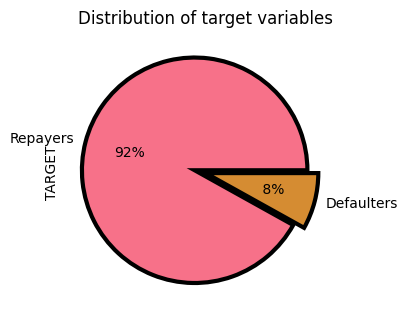

In [ ]:
#Data visualization
#this graph is about target variable which are defaulter and repayer
plt.figure(figsize=(8,6))
plt.subplot(122)
application_dframe["TARGET"].value_counts().plot.pie(autopct = "%2.0f%%",colors = sns.color_palette("husl",9),labels=["Repayers","Defaulters"],
                                                                        wedgeprops={"linewidth":3,"edgecolor":"k"},explode=[.1,0])
plt.title("Distribution of target variables")
plt.show()

**The above graph displays the distribution of target variables which are repayers and defaulter**

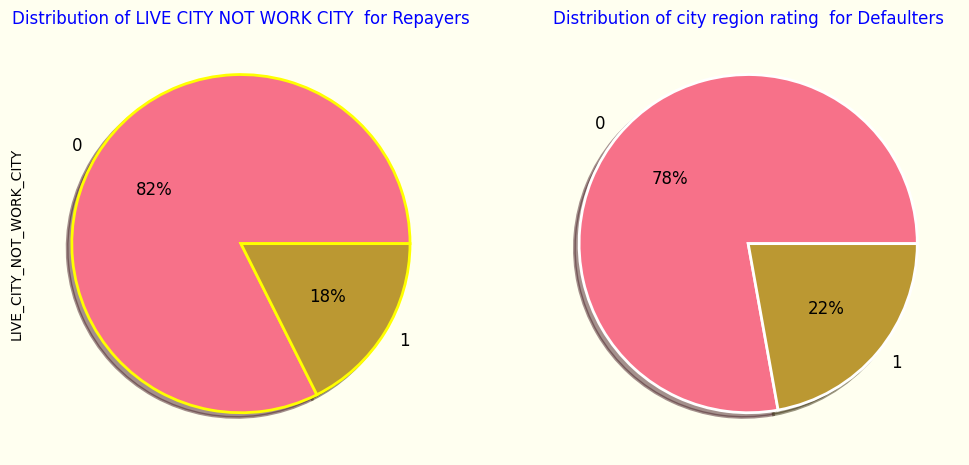

In [ ]:
#Distribution of registration days for target variable.
fig = plt.figure(figsize=(12,17))
plt.subplot(221)
application_dframe[application_dframe["TARGET"]==0]["LIVE_CITY_NOT_WORK_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("husl"),
                                              wedgeprops={"linewidth":2,"edgecolor":"yellow"},shadow =True)

plt.title("Distribution of LIVE CITY NOT WORK CITY  for Repayers",color="b")

plt.subplot(222)
application_dframe[application_dframe["TARGET"]==1]["LIVE_CITY_NOT_WORK_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("husl"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)




plt.title("Distribution of city region rating  for Defaulters",color="b")
plt.ylabel("")
fig.set_facecolor("ivory")

**The above graph displays the distribution of the city with the repayers and defaulters**

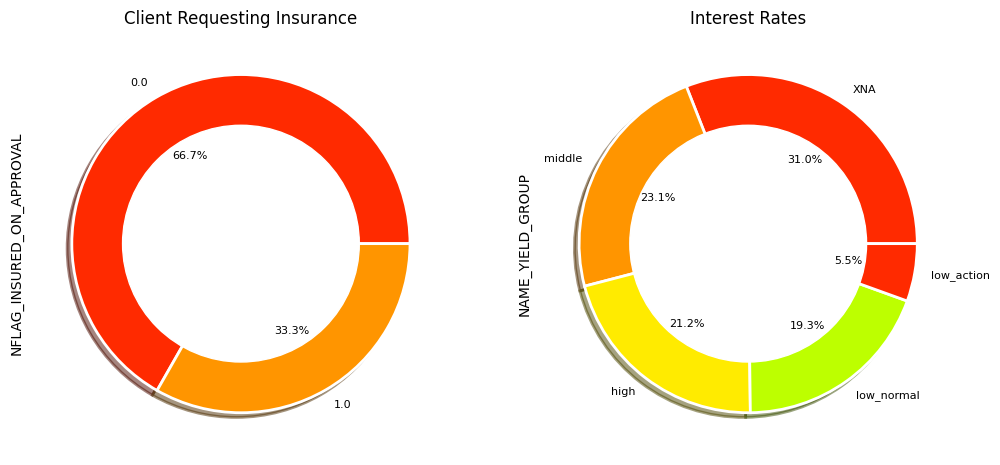

In [ ]:
#client demanding insurance and interest rate
plt.figure(figsize=(12,6))
plt.subplot(121)
previous_dframe["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Client Requesting Insurance")

plt.subplot(122)
previous_dframe["NAME_YIELD_GROUP"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Interest Rates")
plt.show()

**The above graph displays the client requesting about the insurance and the interest rate while applying for the loan**

##DATA CLEANING

In [ ]:
#checking the null values in application data
per_miss_app=round(100*(application_dframe.isnull().sum()/len(application_dframe.index)), 2)
per_miss_app

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [ ]:
#checking the null values in previous data
per_miss_prev= round(100*(previous_dframe.isnull().sum()/len(previous_dframe.index)), 2)
per_miss_prev

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [ ]:
application_dframe.isnull().all(axis=1).sum()

0

In [ ]:
previous_dframe.isnull().all(axis=1).sum()

0

In [ ]:
#finding no of rows
rows=len(application_dframe.index)

In [ ]:
#Get the columns in which are all values are null
nan_col_application=list(application_dframe.columns[application_dframe.isnull().sum()==rows])
nan_col_application

[]

In [ ]:
#Get the columns having greater than 50% null value for application data
per_miss_app=per_miss_app[per_miss_app.values>50.0]
print(per_miss_app)
len(per_miss_app)

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

41

In [ ]:
#Get the columns having greater than 50% null value for previous data
per_miss_prev=per_miss_prev[per_miss_prev.values>50.0]
print(per_miss_prev)
len(per_miss_prev)

AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64


4

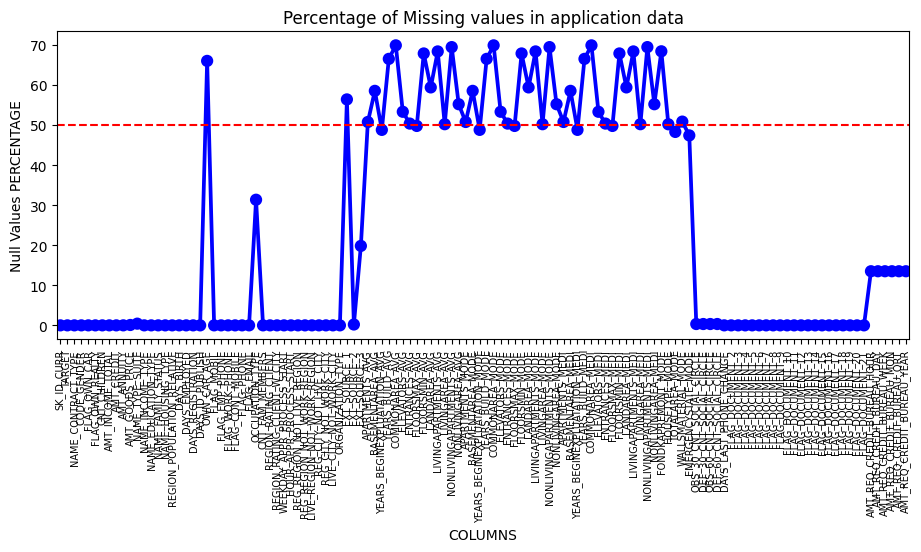

In [ ]:
#ploting graph for the application dataframe to findout the columns having null values percent more than 50%
missing_value_application_dframe = pd.DataFrame((application_dframe.isnull().sum())*100/application_dframe.shape[0]).reset_index()
missing_value_application_dframe.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(11,4))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=missing_value_application_dframe,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(50, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

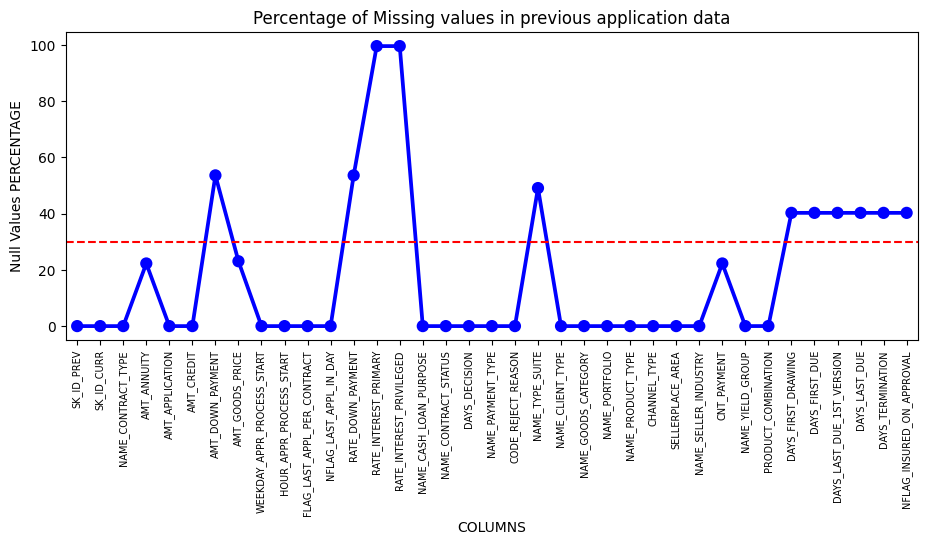

In [ ]:
#ploting graph for the previous dataframe to findout the columns having null values percent more than 30%
missing_value_previous_dframe = pd.DataFrame((previous_dframe.isnull().sum())*100/previous_dframe.shape[0]).reset_index()
missing_value_previous_dframe.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(11,4))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=missing_value_previous_dframe,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(30, ls='--',color='red')
plt.title("Percentage of Missing values in previous application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

Drop the columns with percentage null greater than 60% for previous_app


In [ ]:
#Removing those 41 columns which have missing values more than 50% in application data
cols_dropped=([per_miss_app[per_miss_app >=50.00].index])
application_dframe.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [ ]:
application_dframe.shape

(307511, 81)

In [ ]:
#Removing those 4 columns which have missing values more than 50% in  previous application data
cols_dropped2=([per_miss_prev[per_miss_prev >=30.00].index])
previous_dframe.drop(labels=cols_dropped2[0],axis=1,inplace=True)

In [ ]:
previous_dframe.shape

(1670214, 33)

In [ ]:
#cheking after removing the null values
100*(application_dframe.isnull().sum()/len(application_dframe.index))

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

Remove unnecessary columns

<Figure size 200x300 with 0 Axes>

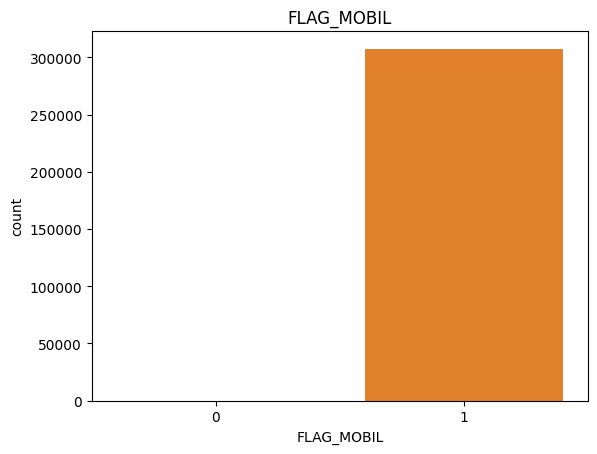

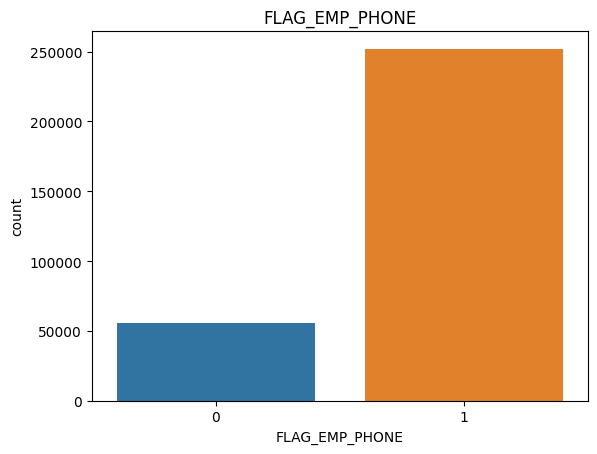

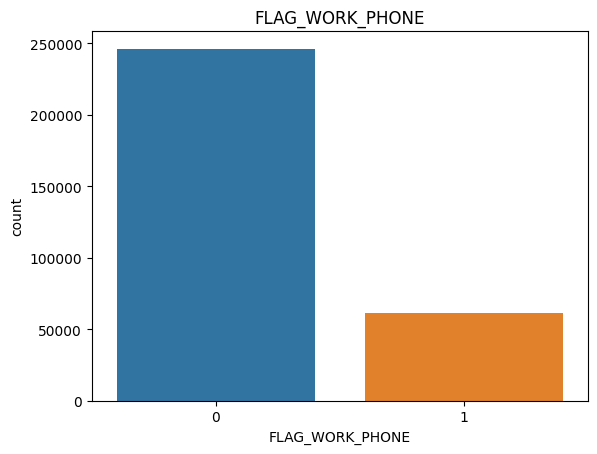

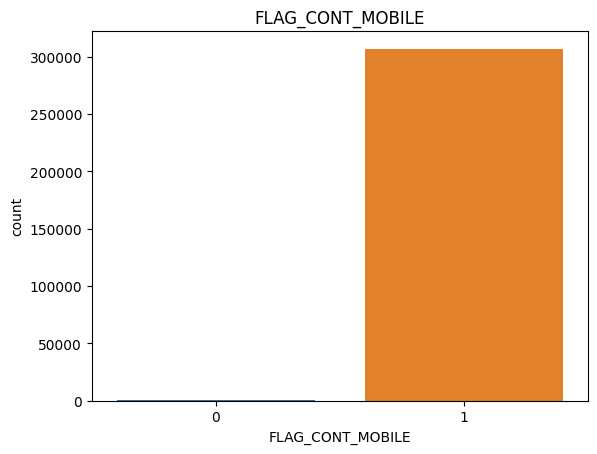

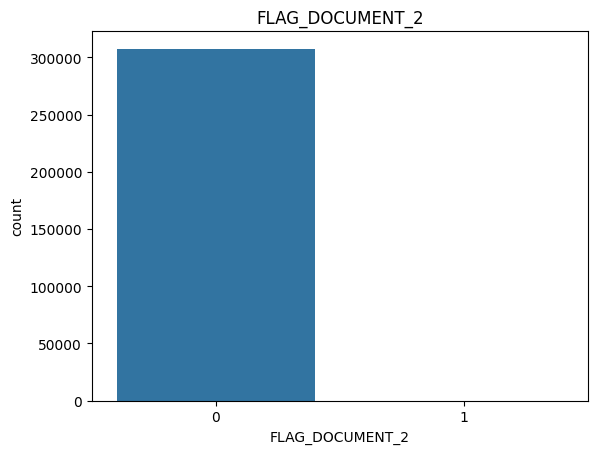

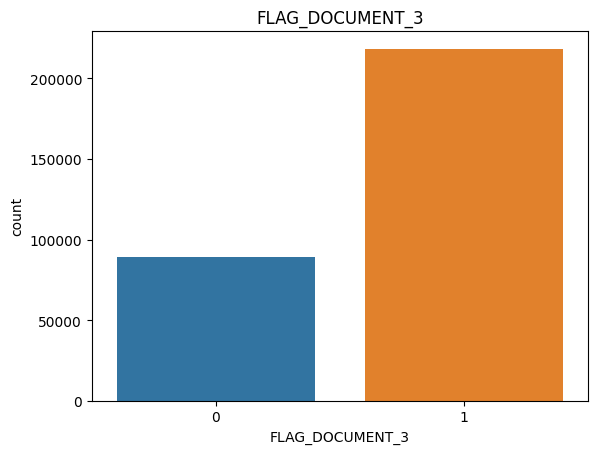

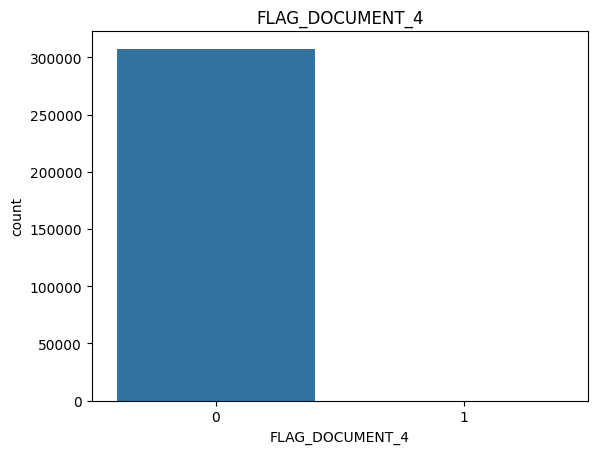

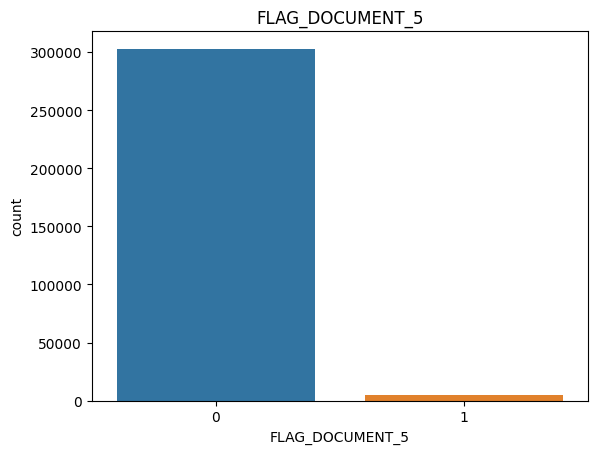

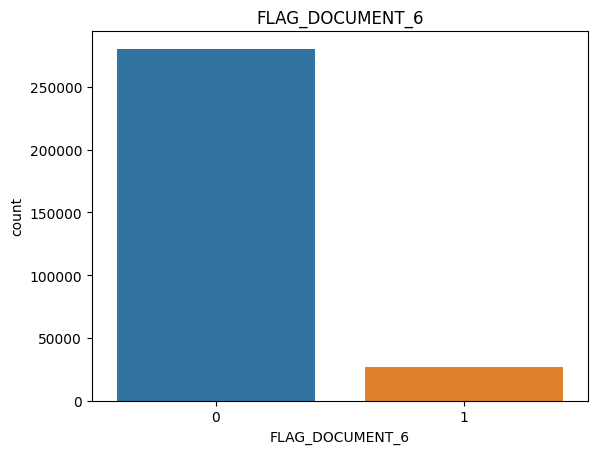

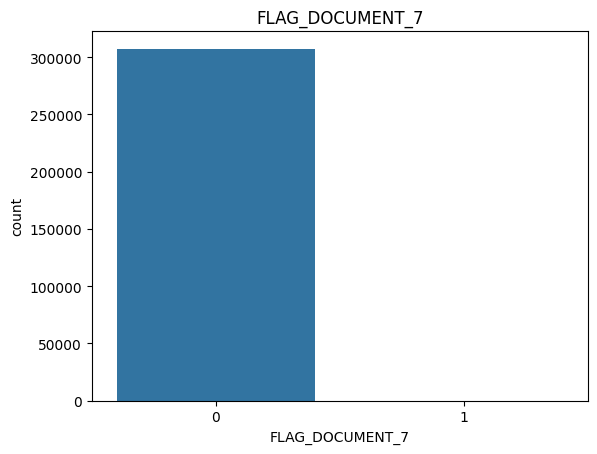

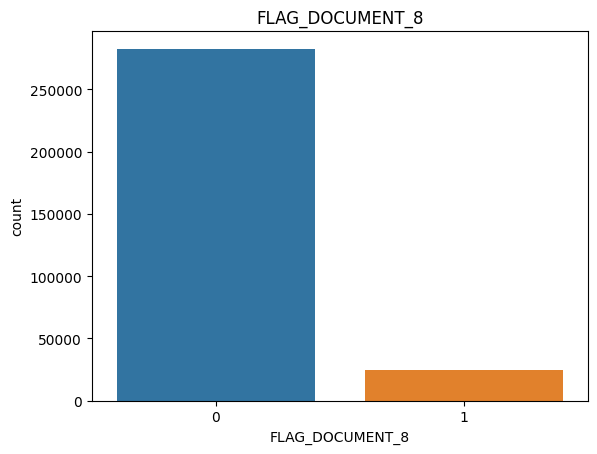

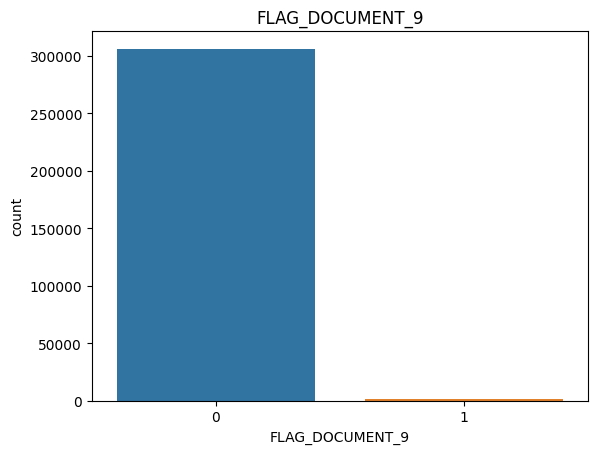

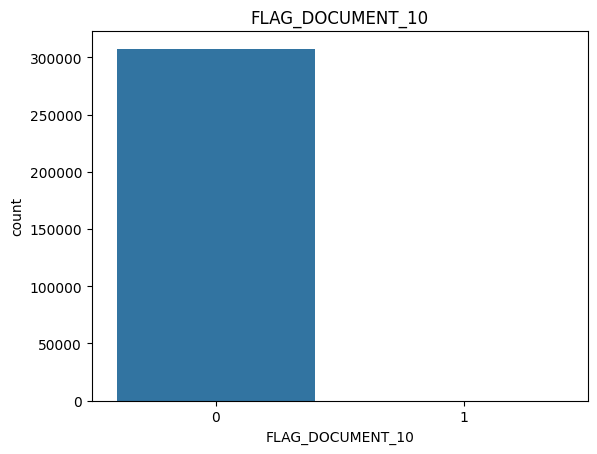

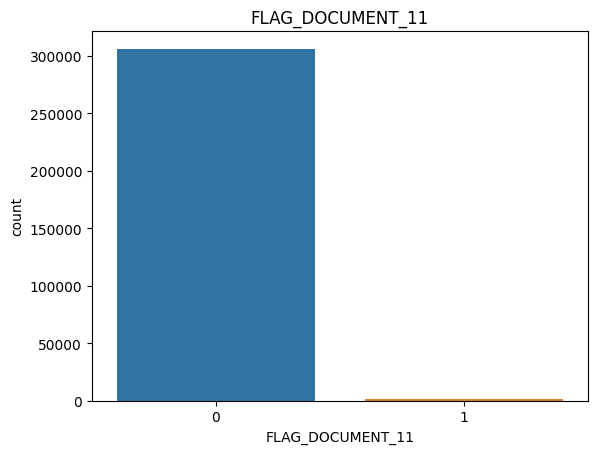

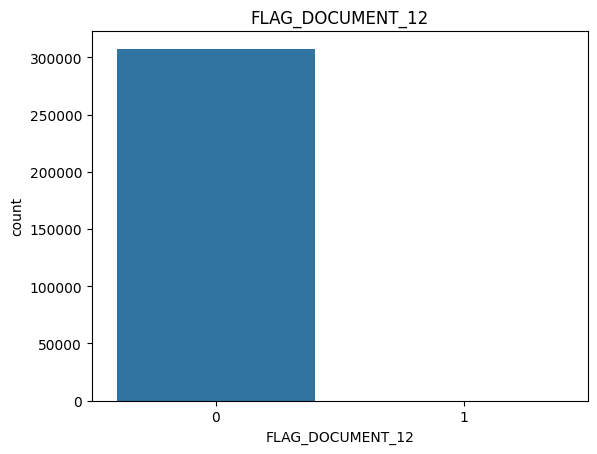

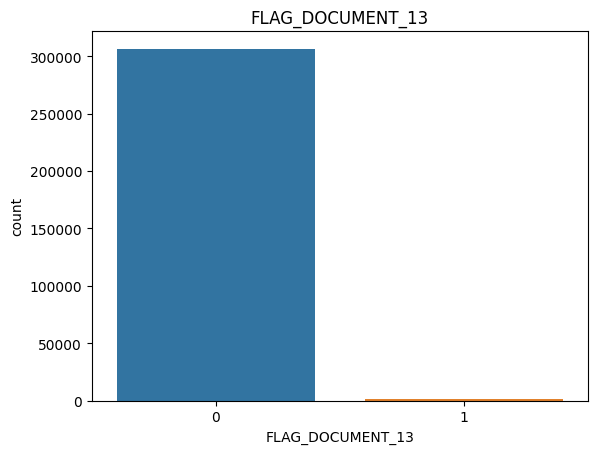

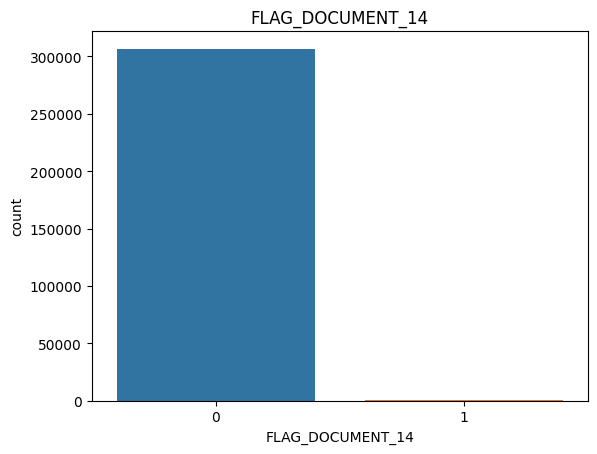

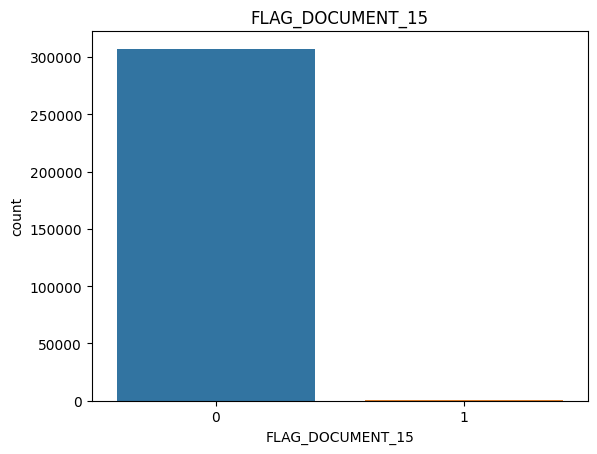

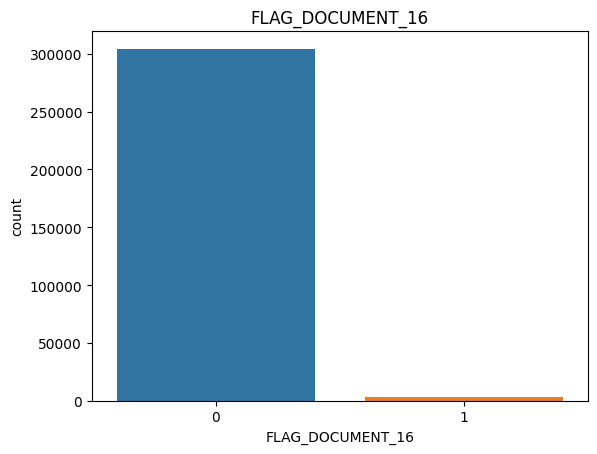

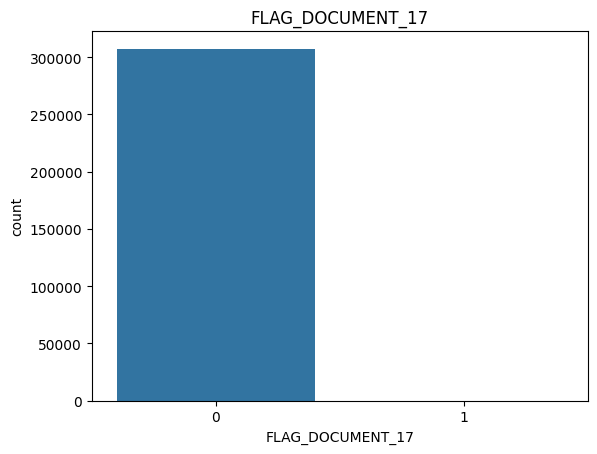

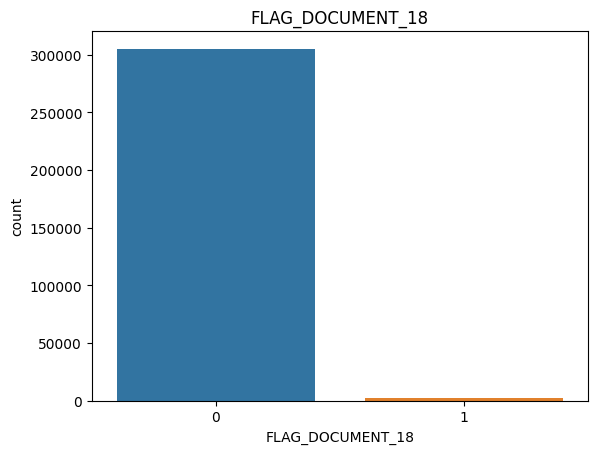

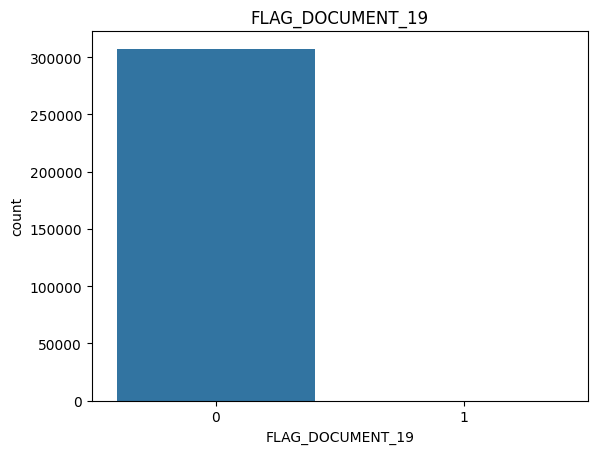

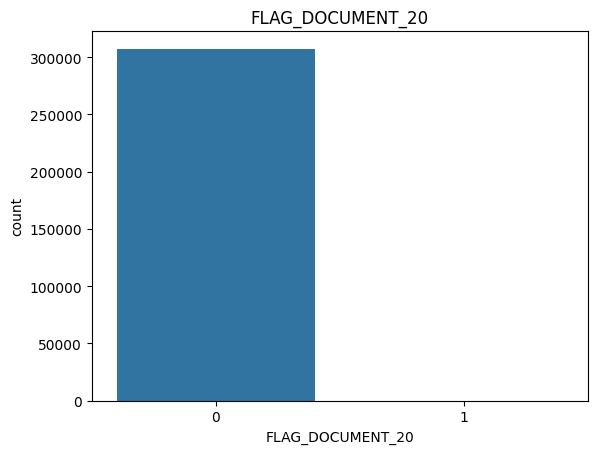

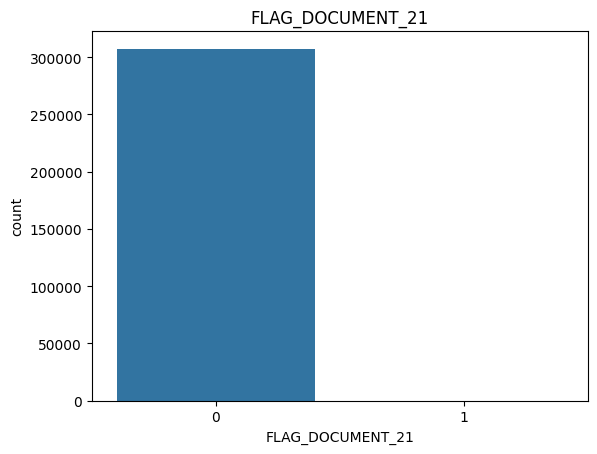

In [ ]:
#removing unnecessary columns
flag_col = [
      'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
application_dframe_flag = application_dframe[flag_col+["TARGET"]]
fig = plt.figure(figsize=(2,3))

for i in flag_col:
    plt.figure()
    sns.countplot(x = i, data = application_dframe_flag)
    plt.title(i)   

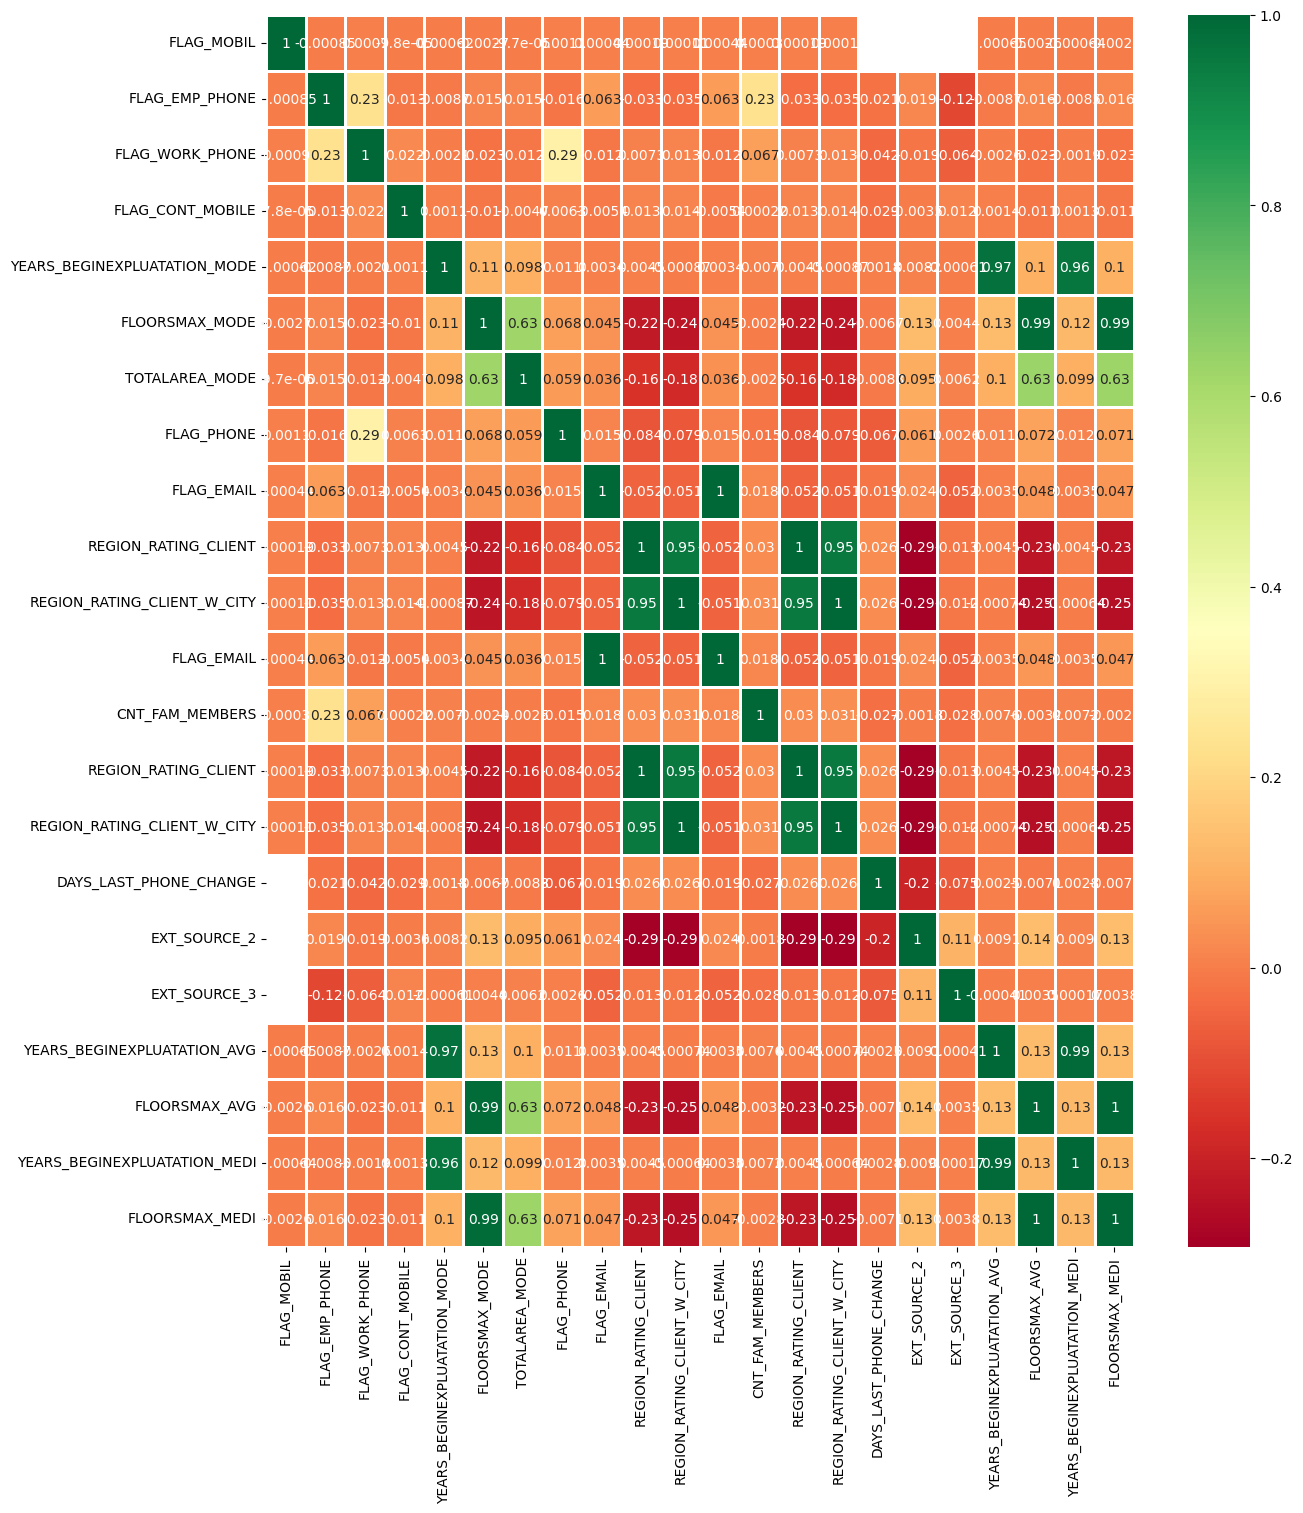

In [ ]:
another_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI']

drop_corr = application_dframe[another_col].corr()
fig = plt.figure(figsize=(14,16))
ax = sns.heatmap(drop_corr,
            xticklabels=drop_corr.columns,
            yticklabels=drop_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

##Feature selection and engineering

In [ ]:
#selecting features
cols_to_drop=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI']

len(cols_to_drop)

43

In [ ]:
application_dframe.drop(labels=cols_to_drop,axis='columns',inplace=True)

In [ ]:
application_dframe.shape

(307511, 41)

In [ ]:
#change negative to positive
100*(application_dframe.isnull().sum()/len(application_dframe.index))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

In [ ]:
application_dframe['DAYS_REGISTRATION']=abs(application_dframe['DAYS_REGISTRATION'])
application_dframe['DAYS_ID_PUBLISH']=abs(application_dframe['DAYS_ID_PUBLISH'])
application_dframe['DAYS_BIRTH']=abs(application_dframe['DAYS_BIRTH'])
application_dframe['DAYS_EMPLOYED']=abs(application_dframe['DAYS_EMPLOYED'])

In [ ]:
#Conversion to numeric
non_nu = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',
                       'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                       'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'
                      ]
for col in non_nu:
    application_dframe[col] =le.fit_transform(application_dframe[col])

In [ ]:
application_dframe.describe().T.sort_values(ascending =0,by='mean').style.background_gradient(cmap='BuGn').bar(subset=['std'], color='red').bar(subset=['mean'], color='blue')

,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT,307511.000000,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4050000.000000
AMT_GOODS_PRICE,307233.000000,538396.207429,369446.460540,40500.000000,238500.000000,450000.000000,679500.000000,4050000.000000
SK_ID_CURR,307511.000000,278180.518577,102790.175348,100002.000000,189145.500000,278202.000000,367142.500000,456255.000000
AMT_INCOME_TOTAL,307511.000000,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,117000000.000000
DAYS_EMPLOYED,307511.000000,67724.742149,139443.751806,0.000000,933.000000,2219.000000,5707.000000,365243.000000
AMT_ANNUITY,307499.000000,27108.573909,14493.737315,1615.500000,16524.000000,24903.000000,34596.000000,258025.500000
DAYS_BIRTH,307511.000000,16036.995067,4363.988632,7489.000000,12413.000000,15750.000000,19682.000000,25229.000000
DAYS_REGISTRATION,307511.000000,4986.120328,3522.886321,0.000000,2010.000000,4504.000000,7479.500000,24672.000000
DAYS_ID_PUBLISH,307511.000000,2994.202373,1509.450419,0.000000,1720.000000,3254.000000,4299.000000,7197.000000
ORGANIZATION_TYPE,307511.000000,29.450429,20.463558,0.000000,5.000000,33.000000,47.000000,57.000000


In [ ]:
float(100*(12/307511))

0.003902299429939092

In [ ]:
#Percentage of missing values in "AMT_GOODS_PRICE" column
float(100*(278/307511))

0.09040327012692229

In [ ]:
100*(1292/307511)

0.42014757195677555

In [ ]:
application_dframe.NAME_TYPE_SUITE.value_counts(normalize= True)

6    0.808186
1    0.130561
5    0.036974
0    0.010624
4    0.005756
7    0.004201
3    0.002816
2    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

In [ ]:
100*(96391/307511)

31.345545362604916

In [ ]:
#print the percentage of each OCCUPATION_TYPE in the data frame df.
application_dframe.OCCUPATION_TYPE.value_counts(normalize= True)

18    0.313455
8     0.179460
14    0.104393
3     0.089655
10    0.069497
4     0.060495
6     0.037007
0     0.031911
11    0.027762
16    0.021856
2     0.019336
1     0.015131
12    0.008624
9     0.006806
17    0.004384
15    0.004244
13    0.002442
5     0.001831
7     0.001711
Name: OCCUPATION_TYPE, dtype: float64

In [ ]:
cols = ["OCCUPATION_TYPE","AMT_GOODS_PRICE"]
for i in cols :
    application_dframe[i]  = application_dframe[i].fillna(application_dframe[i].mode()[0])

In [ ]:
cols = ["AMT_ANNUITY","AMT_GOODS_PRICE",'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for i in cols :
    application_dframe[i]  = application_dframe[i].fillna(application_dframe[i].median())

In [ ]:
application_dframe.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATI

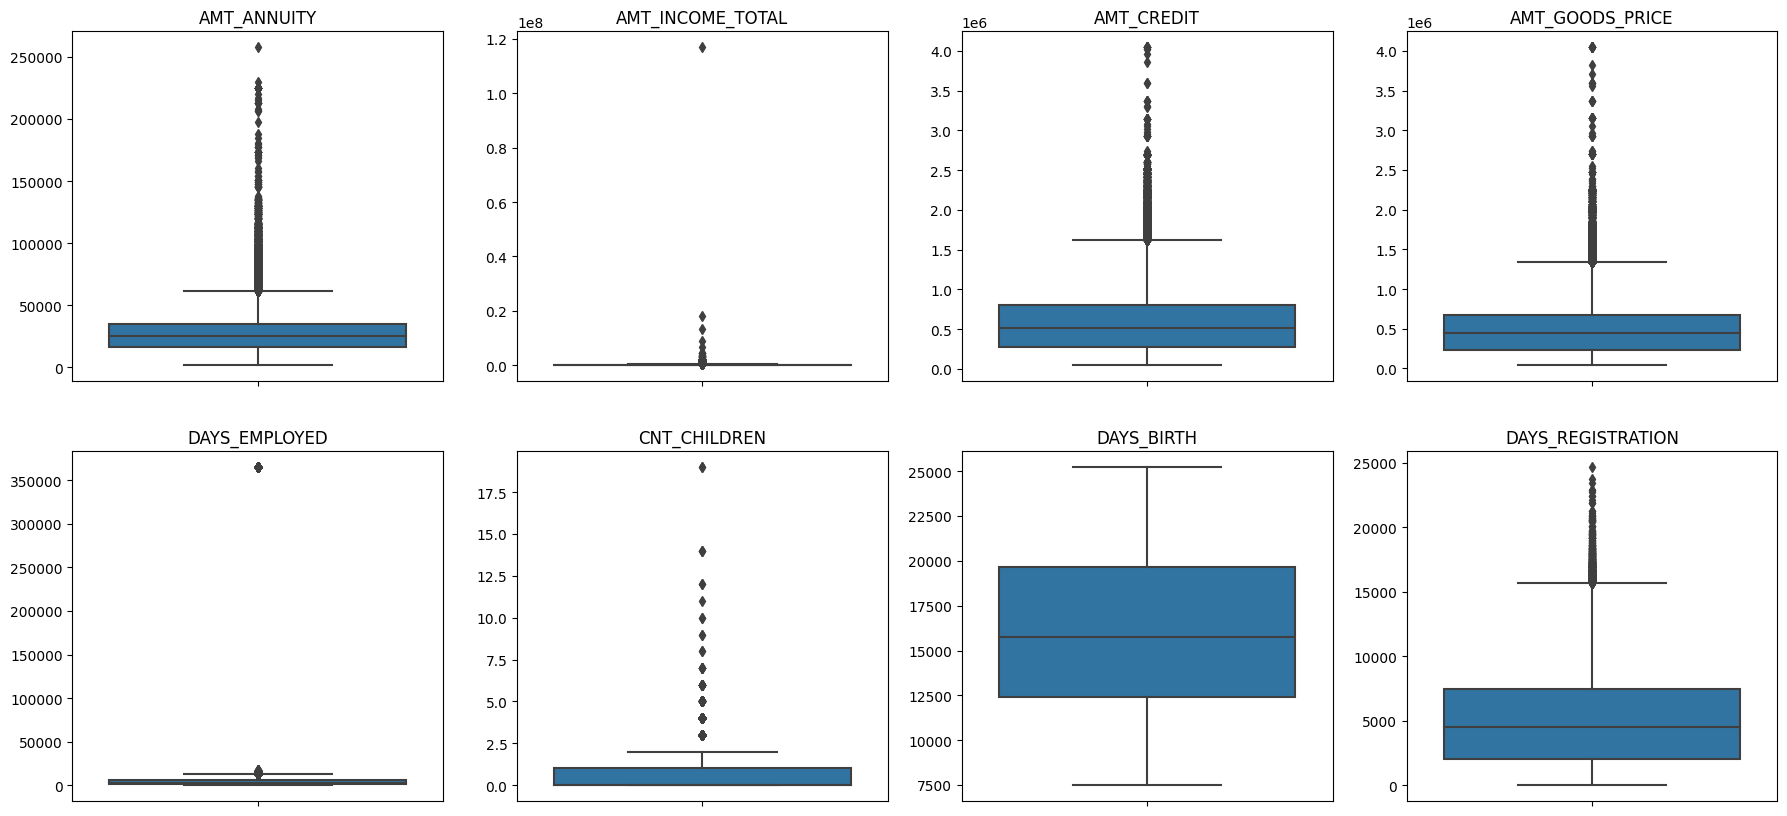

In [ ]:
#outliers
plt.figure(figsize=(22,10))

application_outlier = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH','DAYS_REGISTRATION']

for i in enumerate(application_outlier):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=application_dframe[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [ ]:
upper_limit =application_dframe['AMT_ANNUITY'].mean()+4*application_dframe['AMT_ANNUITY'].std()
lower_limit =application_dframe['AMT_ANNUITY'].mean()-4*application_dframe['AMT_ANNUITY'].std()
application_dframe=application_dframe[(application_dframe['AMT_ANNUITY']>lower_limit)&(application_dframe['AMT_ANNUITY']<upper_limit)]

In [ ]:
upper_limit =application_dframe['AMT_CREDIT'].mean()+4*application_dframe['AMT_CREDIT'].std()
lower_limit =application_dframe['AMT_CREDIT'].mean()-4*application_dframe['AMT_CREDIT'].std()
application_dframe=application_dframe[(application_dframe['AMT_CREDIT']>lower_limit)&(application_dframe['AMT_CREDIT']<upper_limit)]

In [ ]:
upper_limit =application_dframe['AMT_GOODS_PRICE'].mean()+9*application_dframe['AMT_GOODS_PRICE'].std()
lower_limit =application_dframe['AMT_GOODS_PRICE'].mean()-9*application_dframe['AMT_GOODS_PRICE'].std()
application_dframe=application_dframe[(application_dframe['AMT_GOODS_PRICE']>lower_limit)&(application_dframe['AMT_GOODS_PRICE']<upper_limit)]

In [ ]:
upper_limit =application_dframe['CNT_CHILDREN'].mean()+4*application_dframe['CNT_CHILDREN'].std()
lower_limit =application_dframe['CNT_CHILDREN'].mean()-4*application_dframe['CNT_CHILDREN'].std()
application_dframe=application_dframe[(application_dframe['CNT_CHILDREN']>lower_limit)&(application_dframe['CNT_CHILDREN']<upper_limit)]

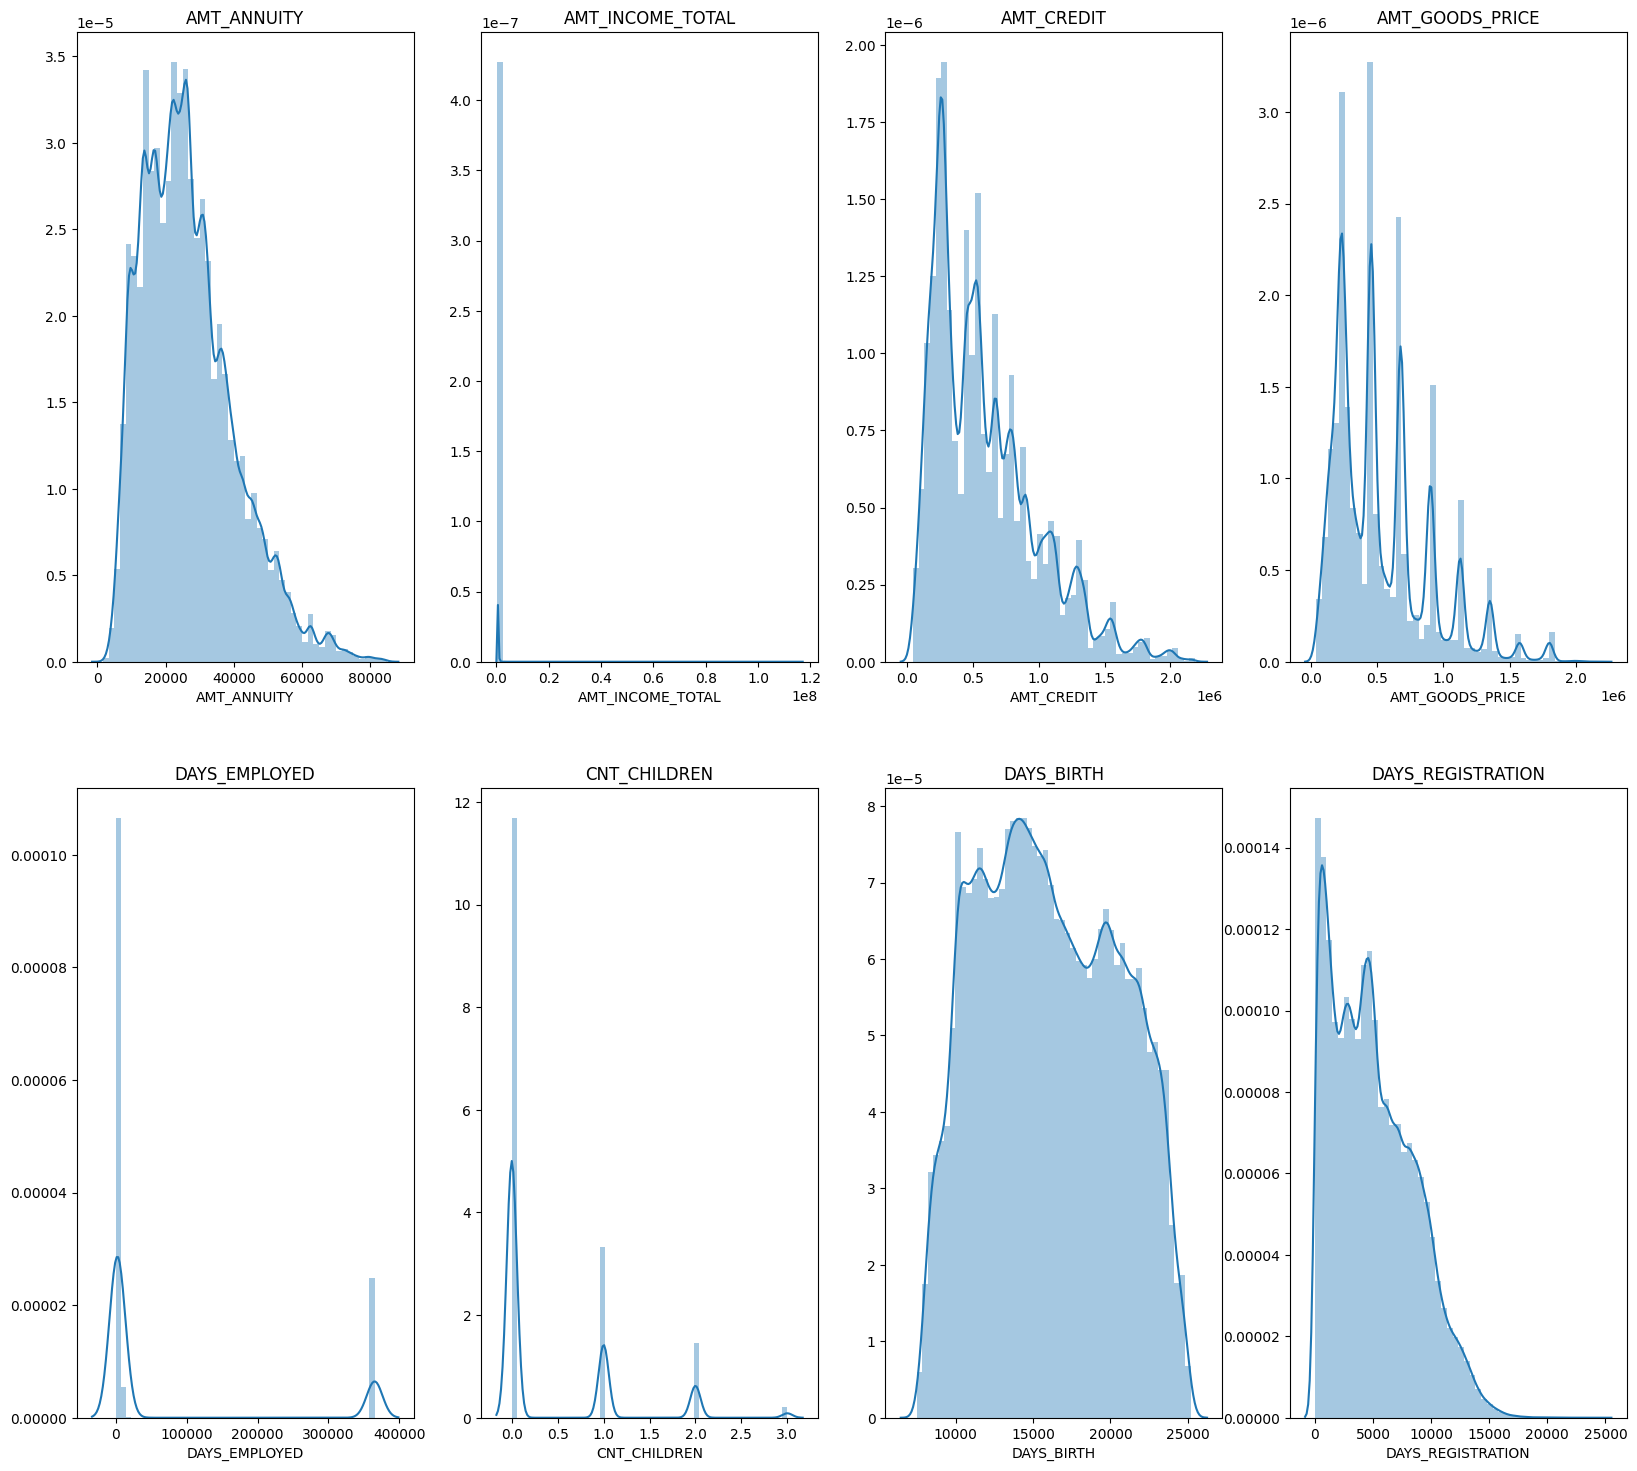

In [ ]:
#distribution plot
plt.figure(figsize=(20,18))
for i in enumerate(application_outlier):
    plt.subplot(2,4,i[0]+1)
    sns.distplot(application_dframe[i[1]])
    plt.title(i[1])
    plt.ylabel("")

Scaling

The scaling will indeed depend of the type of data that you will. MinMaxScaler will transform each value in the column proportionally within the range [0,1]. This is quite acceptable in cases where we are not concerned about the standardisation along the variance axes.

In [ ]:
columns_scale = [ 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       ]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
application_dframe[columns_scale] = scaler.fit_transform(application_dframe[columns_scale])

In [ ]:
#check again this part colmns should be 41 and not 105
application_dframe.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0.0,0.5,0.0,1.0,0.0,0.001512,0.168970,0.276774,...,0.005747,0.058824,0.005814,0.083333,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0.0,0.0,0.0,0.0,0.0,0.002089,0.583408,0.408632,...,0.002874,0.000000,0.002907,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1.0,0.5,1.0,1.0,0.0,0.000358,0.042056,0.061559,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0.0,0.0,0.0,1.0,0.0,0.000935,0.125084,0.336552,...,0.005747,0.000000,0.005814,0.000000,0.0,0.0,0.0,0.0,0.0,1.0


##MODEL



In [ ]:
#spliting data
X = application_dframe.drop(['TARGET'], axis=1)
y=application_dframe.TARGET

In [ ]:
len(y)

304854

In [ ]:
len(X)

304854

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)

In [ ]:
len(X_train)

243883

In [ ]:
len(y_train)

243883

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_params = {
    
            
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }    
    },
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]
            
        }
    }, 
        
    
      }

In [ ]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.917096,{'n_estimators': 10}
1,logistic_regression,0.917793,{'C': 1}
2,naive_bayes_gaussian,0.917793,{}
3,decision_tree,0.846624,{'criterion': 'entropy'}
4,XGB_Classifier,0.917490,{'base_score': 0.5}


##MODEL EVALUATION METRICS

In [ ]:
#logstic regression
reg1=LogisticRegression()
reg1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
reg1.score(X_test, y_test)

0.9214380607173902

In [ ]:
y_predicted1 = reg1.predict(X_test)
y_predicted1[:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predicted1)
cm1

array([[56181,     0],
       [ 4790,     0]])

Text(95.72222222222221, 0.5, 'Truth')

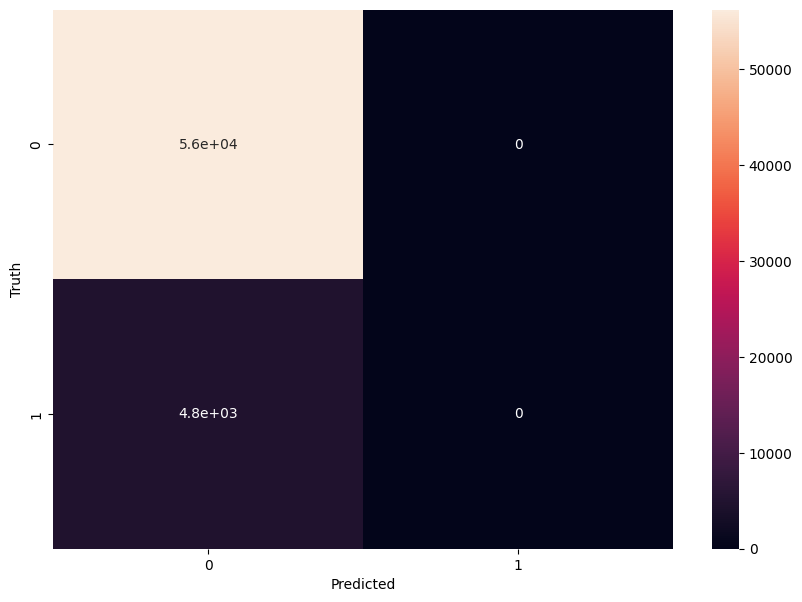

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56181
           1       0.00      0.00      0.00      4790

    accuracy                           0.92     60971
   macro avg       0.46      0.50      0.48     60971
weighted avg       0.85      0.92      0.88     60971



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted1)

0.9214380607173902

In [ ]:
#Mean Squared Error

#Mean Squared Error (MSE), the most common measure for regression prediction performance, is the average of the squared residuals (the difference between the actual value and the predicted value).
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted1)
print(f'{mean_squared_error}: {mse}')

<function mean_squared_error at 0x7f13ede99550>: 0.07856193928260977


In [ ]:
#XGB
reg3=XGBClassifier()
reg3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
reg3.score(X_test, y_test)

0.9211100359187154

In [ ]:
y_predicted3 = reg3.predict(X_test)
y_predicted3[:5]

array([0, 0, 0, 0, 0])

In [ ]:
y_test[:5]

157649    0
305792    0
21780     0
101275    0
12637     0
Name: TARGET, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_predicted3)
cm3

array([[56147,    34],
       [ 4776,    14]])

Text(95.72222222222221, 0.5, 'Truth')

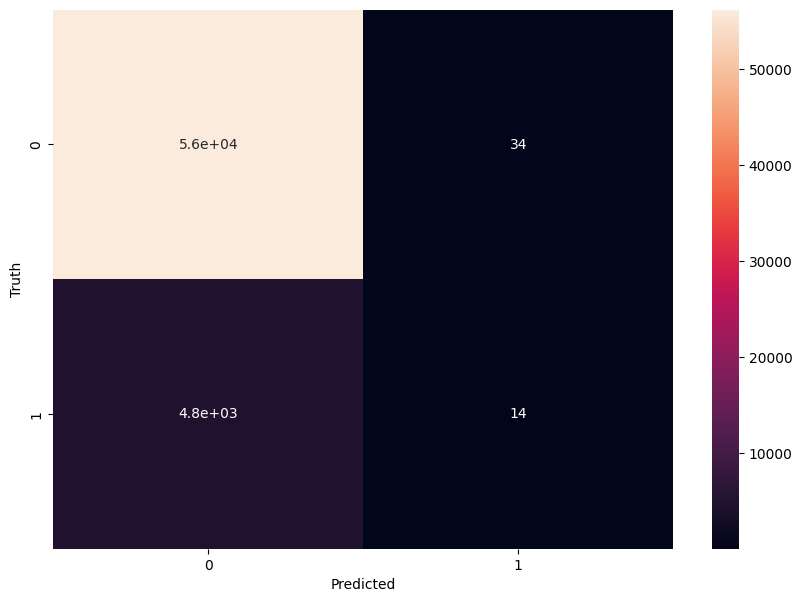

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted3))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56181
           1       0.29      0.00      0.01      4790

    accuracy                           0.92     60971
   macro avg       0.61      0.50      0.48     60971
weighted avg       0.87      0.92      0.88     60971



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted3)

0.9211100359187154

In [ ]:
mse3 = mean_squared_error(y_test,y_predicted3)
print(f'{mean_squared_error}: {mse3}')

<function mean_squared_error at 0x7f13ede99550>: 0.07888996408128454
